In [1]:
import os
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import mixture as mix
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import time
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
import plotly.express as px
import plotly.graph_objects as go
import backtrader as bt

In [104]:
api_key ="0eT1I6r9sGg0iArxRBINHUI4RJeoqlAdPyK5IFS7Kh8KVqg3Xo6SkpvQgDS3OGCE"
api_secret ="UjXAnBtjy3mJ20QUl2M2MY33gXF6JpTePmY4vkuAHDPc6iA7UzGRf98t4AXOBZES"

In [105]:
from binance.client import Client
from time import sleep
from binance import ThreadedWebsocketManager
client = Client(api_key, api_secret)
client.API_URL = 'https://testnet.binance.vision/api'
print(client.get_account())

{'makerCommission': 0, 'takerCommission': 0, 'buyerCommission': 0, 'sellerCommission': 0, 'canTrade': True, 'canWithdraw': False, 'canDeposit': False, 'updateTime': 1640876403076, 'accountType': 'SPOT', 'balances': [{'asset': 'BNB', 'free': '1000.00000000', 'locked': '0.00000000'}, {'asset': 'BTC', 'free': '0.89000000', 'locked': '0.00000000'}, {'asset': 'BUSD', 'free': '10000.00000000', 'locked': '0.00000000'}, {'asset': 'ETH', 'free': '98.15206000', 'locked': '0.00000000'}, {'asset': 'LTC', 'free': '500.00000000', 'locked': '0.00000000'}, {'asset': 'TRX', 'free': '500000.00000000', 'locked': '0.00000000'}, {'asset': 'USDT', 'free': '13225.97501500', 'locked': '0.00000000'}, {'asset': 'XRP', 'free': '50000.00000000', 'locked': '0.00000000'}], 'permissions': ['SPOT']}


In [106]:
client.get_account()

{'makerCommission': 0,
 'takerCommission': 0,
 'buyerCommission': 0,
 'sellerCommission': 0,
 'canTrade': True,
 'canWithdraw': False,
 'canDeposit': False,
 'updateTime': 1640876403076,
 'accountType': 'SPOT',
 'balances': [{'asset': 'BNB',
   'free': '1000.00000000',
   'locked': '0.00000000'},
  {'asset': 'BTC', 'free': '0.89000000', 'locked': '0.00000000'},
  {'asset': 'BUSD', 'free': '10000.00000000', 'locked': '0.00000000'},
  {'asset': 'ETH', 'free': '98.15206000', 'locked': '0.00000000'},
  {'asset': 'LTC', 'free': '500.00000000', 'locked': '0.00000000'},
  {'asset': 'TRX', 'free': '500000.00000000', 'locked': '0.00000000'},
  {'asset': 'USDT', 'free': '13225.97501500', 'locked': '0.00000000'},
  {'asset': 'XRP', 'free': '50000.00000000', 'locked': '0.00000000'}],
 'permissions': ['SPOT']}

In [107]:
# Lấy giá bitcoin mới nhất 
btc_price = client.get_symbol_ticker(symbol="BTCUSDT")
btc_price

{'symbol': 'BTCUSDT', 'price': '46202.56000000'}

In [108]:
from time import sleep
from binance import ThreadedWebsocketManager

In [109]:
btc_price={'error' : False}
btc_price

{'error': False}

In [110]:
def btc_trade_history(msg):
    ''' define how to process incoming WebSocket messages '''
    if msg['e'] != 'error':
        btc_price['Event_time'] = msg['E']
        btc_price['last'] = msg['c']
        print(msg['c'])
        btc_price['bid'] = msg['b']
        btc_price['ask'] = msg['a']
        btc_price['open'] = msg['o']
        btc_price['high'] = msg['h']
        btc_price['low'] = msg['l']
        btc_price['error'] = False
    else:
        btc_price['error'] = True

In [111]:
bsm = ThreadedWebsocketManager()
bsm.start()

In [112]:
bsm.start_symbol_ticker_socket(callback=btc_trade_history, symbol='BTCUSDT')

'btcusdt@ticker'

46167.50000000
46172.99000000
46178.44000000


In [113]:
bsm.stop()

46176.48000000


In [114]:
btc_price

{'error': False,
 'Event_time': 1641266642873,
 'last': '46176.48000000',
 'bid': '46176.48000000',
 'ask': '46176.49000000',
 'open': '46934.02000000',
 'high': '47570.00000000',
 'low': '45696.00000000'}

In [115]:
timestamp = client._get_earliest_valid_timestamp('BTCUSDT', '1m')
timestamp

1638536880000

In [116]:
import datetime
df = datetime.datetime.fromtimestamp(timestamp/1000)
str(df)

'2021-12-03 20:08:00'

In [117]:
bars = client.get_historical_klines('BTCUSDT','15m',timestamp,limit=1000)

In [118]:
bars_1 = client.get_historical_klines('BTCUSDT','30m',timestamp, limit=1000)
df_30_m = pd.DataFrame(data=bars_1)
df_30_m

,0,1,2,3,4,5,6,7,8,9,10,11
0,1638538200000,56920.77000000,57591.15000000,40045.23000000,56860.01000000,10.71141000,1638539999999,611222.45131437,1816,10.02180200,572041.01576943,0
1,1638540000000,56863.20000000,56926.68000000,25172.90000000,56716.66000000,10.71320900,1638541799999,603438.21853678,1643,9.41382300,534204.35844848,0
2,1638541800000,56716.66000000,56790.02000000,55881.08000000,56239.13000000,11.20528400,1638543599999,632691.76965182,1730,10.91128400,616103.69477212,0
3,1638543600000,56193.15000000,56346.63000000,34727.40000000,56319.11000000,12.31632600,1638545399999,682234.50435553,1855,11.18093400,628192.40677339,0
4,1638545400000,56284.25000000,56291.51000000,36785.32000000,55980.14000000,10.71029200,1638547199999,591457.68060004,1605,9.51261800,533105.84614071,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1511,1641258000000,46243.01000000,46399.80000000,46156.10000000,46338.45000000,7.67049400,1641259799999,354872.53299407,1264,7.03645800,325539.68019321,0
1512,1641259800000,46338.57000000,46448.07000000,46029.86000000,46059.07000000,8.87350100,1641261599999,409587.15043702,1370,6.19989800,286196.76347364,0
1513,1641261600000,46054.99000000,46149.84000000,45942.45000000,46129.53000000,7.17287000,1641263399999,330351.72394362,1172,6.55772900,302024.27608014,0
1514,1641263400000,46129.54000000,46255.56000000,46070.55000000,46117.22000000,6.25998700,1641265199999,288892.37367156,1023,5.74025600,264907.41892464,0


In [119]:
df_4h = pd.DataFrame(data=bars)

In [120]:
df_4h

,0,1,2,3,4,5,6,7,8,9,10,11
0,1638537300000,56898.13000000,58801.00000000,31088.27000000,56918.24000000,5.48227500,1638538199999,312973.40663050,696,3.92115800,223307.76724428,0
1,1638538200000,56920.77000000,57591.15000000,40212.87000000,57102.65000000,5.48289900,1638539099999,313837.48843003,935,5.08403400,291182.84849830,0
2,1638539100000,57100.01000000,57100.14000000,40045.23000000,56860.01000000,5.22851100,1638539999999,297384.96288434,881,4.93776800,280858.16727113,0
3,1638540000000,56863.20000000,56926.68000000,56282.14000000,56732.85000000,4.75639500,1638540899999,270237.43459579,763,4.54941600,258487.85673008,0
4,1638540900000,56724.37000000,56796.95000000,25172.90000000,56716.66000000,5.95681400,1638541799999,333200.78394099,880,4.86440700,275716.50171840,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3028,1641262500000,45982.59000000,46149.84000000,45942.45000000,46129.53000000,3.39559800,1641263399999,156406.65401824,538,3.22932200,148747.95310984,0
3029,1641263400000,46129.54000000,46255.56000000,46070.55000000,46207.21000000,3.20510700,1641264299999,147920.43253014,532,2.97837800,137456.69512475,0
3030,1641264300000,46202.97000000,46235.85000000,46088.01000000,46117.22000000,3.05488000,1641265199999,140971.94114142,491,2.76187800,127450.72379989,0
3031,1641265200000,46100.00000000,46219.24000000,45300.00000000,46037.03000000,4.79569600,1641266099999,220796.65367570,643,3.09780200,142730.43627241,0


In [121]:
df_30_m.columns = ['Open time','Open','High','Low','Close','Volume','Close time','Quote asset volume','number of trades','Taker buy base asset volume','Taker buy quote asset volume','Ignore']
df_30_m

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
0,1638538200000,56920.77000000,57591.15000000,40045.23000000,56860.01000000,10.71141000,1638539999999,611222.45131437,1816,10.02180200,572041.01576943,0
1,1638540000000,56863.20000000,56926.68000000,25172.90000000,56716.66000000,10.71320900,1638541799999,603438.21853678,1643,9.41382300,534204.35844848,0
2,1638541800000,56716.66000000,56790.02000000,55881.08000000,56239.13000000,11.20528400,1638543599999,632691.76965182,1730,10.91128400,616103.69477212,0
3,1638543600000,56193.15000000,56346.63000000,34727.40000000,56319.11000000,12.31632600,1638545399999,682234.50435553,1855,11.18093400,628192.40677339,0
4,1638545400000,56284.25000000,56291.51000000,36785.32000000,55980.14000000,10.71029200,1638547199999,591457.68060004,1605,9.51261800,533105.84614071,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1511,1641258000000,46243.01000000,46399.80000000,46156.10000000,46338.45000000,7.67049400,1641259799999,354872.53299407,1264,7.03645800,325539.68019321,0
1512,1641259800000,46338.57000000,46448.07000000,46029.86000000,46059.07000000,8.87350100,1641261599999,409587.15043702,1370,6.19989800,286196.76347364,0
1513,1641261600000,46054.99000000,46149.84000000,45942.45000000,46129.53000000,7.17287000,1641263399999,330351.72394362,1172,6.55772900,302024.27608014,0
1514,1641263400000,46129.54000000,46255.56000000,46070.55000000,46117.22000000,6.25998700,1641265199999,288892.37367156,1023,5.74025600,264907.41892464,0


In [122]:
df_4h.columns = ['Open time','Open','High','Low','Close','Volume','Close time','Quote asset volume','number of trades','Taker buy base asset volume','Taker buy quote asset volume','Ignore']
df_4h

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
0,1638537300000,56898.13000000,58801.00000000,31088.27000000,56918.24000000,5.48227500,1638538199999,312973.40663050,696,3.92115800,223307.76724428,0
1,1638538200000,56920.77000000,57591.15000000,40212.87000000,57102.65000000,5.48289900,1638539099999,313837.48843003,935,5.08403400,291182.84849830,0
2,1638539100000,57100.01000000,57100.14000000,40045.23000000,56860.01000000,5.22851100,1638539999999,297384.96288434,881,4.93776800,280858.16727113,0
3,1638540000000,56863.20000000,56926.68000000,56282.14000000,56732.85000000,4.75639500,1638540899999,270237.43459579,763,4.54941600,258487.85673008,0
4,1638540900000,56724.37000000,56796.95000000,25172.90000000,56716.66000000,5.95681400,1638541799999,333200.78394099,880,4.86440700,275716.50171840,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3028,1641262500000,45982.59000000,46149.84000000,45942.45000000,46129.53000000,3.39559800,1641263399999,156406.65401824,538,3.22932200,148747.95310984,0
3029,1641263400000,46129.54000000,46255.56000000,46070.55000000,46207.21000000,3.20510700,1641264299999,147920.43253014,532,2.97837800,137456.69512475,0
3030,1641264300000,46202.97000000,46235.85000000,46088.01000000,46117.22000000,3.05488000,1641265199999,140971.94114142,491,2.76187800,127450.72379989,0
3031,1641265200000,46100.00000000,46219.24000000,45300.00000000,46037.03000000,4.79569600,1641266099999,220796.65367570,643,3.09780200,142730.43627241,0


In [123]:
df_4h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3033 entries, 0 to 3032
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Open time                     3033 non-null   int64 
 1   Open                          3033 non-null   object
 2   High                          3033 non-null   object
 3   Low                           3033 non-null   object
 4   Close                         3033 non-null   object
 5   Volume                        3033 non-null   object
 6   Close time                    3033 non-null   int64 
 7   Quote asset volume            3033 non-null   object
 8   number of trades              3033 non-null   int64 
 9   Taker buy base asset volume   3033 non-null   object
 10  Taker buy quote asset volume  3033 non-null   object
 11  Ignore                        3033 non-null   object
dtypes: int64(3), object(9)
memory usage: 284.5+ KB


In [124]:
from datetime import datetime
len(df_30_m['Open time'])
Date=[]
for i in range(len(df_30_m['Open time'])):
    time = datetime.fromtimestamp((df_30_m['Open time'].loc[i])/1000)
    Date.append(str(time))

In [125]:
from datetime import datetime
len(df_4h['Open time'])
Dates=[]
for i in range(len(df_4h['Open time'])):
    time = datetime.fromtimestamp((df_4h['Open time'].loc[i])/1000)
    Dates.append(str(time))

In [126]:
df_4h['Date']=Dates

In [127]:
df_30_m['Date']=Date

In [128]:
df_4h

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore,Date
0,1638537300000,56898.13000000,58801.00000000,31088.27000000,56918.24000000,5.48227500,1638538199999,312973.40663050,696,3.92115800,223307.76724428,0,2021-12-03 20:15:00
1,1638538200000,56920.77000000,57591.15000000,40212.87000000,57102.65000000,5.48289900,1638539099999,313837.48843003,935,5.08403400,291182.84849830,0,2021-12-03 20:30:00
2,1638539100000,57100.01000000,57100.14000000,40045.23000000,56860.01000000,5.22851100,1638539999999,297384.96288434,881,4.93776800,280858.16727113,0,2021-12-03 20:45:00
3,1638540000000,56863.20000000,56926.68000000,56282.14000000,56732.85000000,4.75639500,1638540899999,270237.43459579,763,4.54941600,258487.85673008,0,2021-12-03 21:00:00
4,1638540900000,56724.37000000,56796.95000000,25172.90000000,56716.66000000,5.95681400,1638541799999,333200.78394099,880,4.86440700,275716.50171840,0,2021-12-03 21:15:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3028,1641262500000,45982.59000000,46149.84000000,45942.45000000,46129.53000000,3.39559800,1641263399999,156406.65401824,538,3.22932200,148747.95310984,0,2022-01-04 09:15:00
3029,1641263400000,46129.54000000,46255.56000000,46070.55000000,46207.21000000,3.20510700,1641264299999,147920.43253014,532,2.97837800,137456.69512475,0,2022-01-04 09:30:00
3030,1641264300000,46202.97000000,46235.85000000,46088.01000000,46117.22000000,3.05488000,1641265199999,140971.94114142,491,2.76187800,127450.72379989,0,2022-01-04 09:45:00
3031,1641265200000,46100.00000000,46219.24000000,45300.00000000,46037.03000000,4.79569600,1641266099999,220796.65367570,643,3.09780200,142730.43627241,0,2022-01-04 10:00:00


In [129]:
df_30_m

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore,Date
0,1638538200000,56920.77000000,57591.15000000,40045.23000000,56860.01000000,10.71141000,1638539999999,611222.45131437,1816,10.02180200,572041.01576943,0,2021-12-03 20:30:00
1,1638540000000,56863.20000000,56926.68000000,25172.90000000,56716.66000000,10.71320900,1638541799999,603438.21853678,1643,9.41382300,534204.35844848,0,2021-12-03 21:00:00
2,1638541800000,56716.66000000,56790.02000000,55881.08000000,56239.13000000,11.20528400,1638543599999,632691.76965182,1730,10.91128400,616103.69477212,0,2021-12-03 21:30:00
3,1638543600000,56193.15000000,56346.63000000,34727.40000000,56319.11000000,12.31632600,1638545399999,682234.50435553,1855,11.18093400,628192.40677339,0,2021-12-03 22:00:00
4,1638545400000,56284.25000000,56291.51000000,36785.32000000,55980.14000000,10.71029200,1638547199999,591457.68060004,1605,9.51261800,533105.84614071,0,2021-12-03 22:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,1641258000000,46243.01000000,46399.80000000,46156.10000000,46338.45000000,7.67049400,1641259799999,354872.53299407,1264,7.03645800,325539.68019321,0,2022-01-04 08:00:00
1512,1641259800000,46338.57000000,46448.07000000,46029.86000000,46059.07000000,8.87350100,1641261599999,409587.15043702,1370,6.19989800,286196.76347364,0,2022-01-04 08:30:00
1513,1641261600000,46054.99000000,46149.84000000,45942.45000000,46129.53000000,7.17287000,1641263399999,330351.72394362,1172,6.55772900,302024.27608014,0,2022-01-04 09:00:00
1514,1641263400000,46129.54000000,46255.56000000,46070.55000000,46117.22000000,6.25998700,1641265199999,288892.37367156,1023,5.74025600,264907.41892464,0,2022-01-04 09:30:00


In [130]:
df_4h['Date']=pd.to_datetime(df_4h['Date'])

In [131]:
df_30_m['Date']=pd.to_datetime(df_30_m['Date'])

In [132]:
import btalib

In [133]:
# Tìm 20sma
df_4h['20sma'] = df_4h.Close.rolling(20).mean()
df_4h.tail(5)

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore,Date,20sma
3028,1641262500000,45982.59000000,46149.84000000,45942.45000000,46129.53000000,3.39559800,1641263399999,156406.65401824,538,3.22932200,148747.95310984,0,2022-01-04 09:15:00,46247.8410
3029,1641263400000,46129.54000000,46255.56000000,46070.55000000,46207.21000000,3.20510700,1641264299999,147920.43253014,532,2.97837800,137456.69512475,0,2022-01-04 09:30:00,46256.4415
3030,1641264300000,46202.97000000,46235.85000000,46088.01000000,46117.22000000,3.05488000,1641265199999,140971.94114142,491,2.76187800,127450.72379989,0,2022-01-04 09:45:00,46263.2590
3031,1641265200000,46100.00000000,46219.24000000,45300.00000000,46037.03000000,4.79569600,1641266099999,220796.65367570,643,3.09780200,142730.43627241,0,2022-01-04 10:00:00,46259.4135
3032,1641266100000,46037.82000000,46209.59000000,46009.22000000,46199.15000000,2.99480000,1641266999999,138121.58685907,461,2.72811000,125821.10709135,0,2022-01-04 10:15:00,46256.1770


In [134]:
df_30_m['20sma'] = df_30_m.Close.rolling(20).mean()
df_30_m.tail(5)

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore,Date,20sma
1511,1641258000000,46243.01000000,46399.80000000,46156.10000000,46338.45000000,7.67049400,1641259799999,354872.53299407,1264,7.03645800,325539.68019321,0,2022-01-04 08:00:00,46351.5110
1512,1641259800000,46338.57000000,46448.07000000,46029.86000000,46059.07000000,8.87350100,1641261599999,409587.15043702,1370,6.19989800,286196.76347364,0,2022-01-04 08:30:00,46320.0085
1513,1641261600000,46054.99000000,46149.84000000,45942.45000000,46129.53000000,7.17287000,1641263399999,330351.72394362,1172,6.55772900,302024.27608014,0,2022-01-04 09:00:00,46307.3790
1514,1641263400000,46129.54000000,46255.56000000,46070.55000000,46117.22000000,6.25998700,1641265199999,288892.37367156,1023,5.74025600,264907.41892464,0,2022-01-04 09:30:00,46289.0770
1515,1641265200000,46100.00000000,46219.24000000,45300.00000000,46199.15000000,7.79049600,1641266999999,358918.24053477,1104,5.82591200,268551.54336376,0,2022-01-04 10:00:00,46264.4930


In [135]:
# In Ngày 
df_4h['Day'] = df_4h['Date'].dt.day
df_4h.head()

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore,Date,20sma,Day
0,1638537300000,56898.13000000,58801.00000000,31088.27000000,56918.24000000,5.48227500,1638538199999,312973.40663050,696,3.92115800,223307.76724428,0,2021-12-03 20:15:00,NaN,3
1,1638538200000,56920.77000000,57591.15000000,40212.87000000,57102.65000000,5.48289900,1638539099999,313837.48843003,935,5.08403400,291182.84849830,0,2021-12-03 20:30:00,NaN,3
2,1638539100000,57100.01000000,57100.14000000,40045.23000000,56860.01000000,5.22851100,1638539999999,297384.96288434,881,4.93776800,280858.16727113,0,2021-12-03 20:45:00,NaN,3
3,1638540000000,56863.20000000,56926.68000000,56282.14000000,56732.85000000,4.75639500,1638540899999,270237.43459579,763,4.54941600,258487.85673008,0,2021-12-03 21:00:00,NaN,3
4,1638540900000,56724.37000000,56796.95000000,25172.90000000,56716.66000000,5.95681400,1638541799999,333200.78394099,880,4.86440700,275716.50171840,0,2021-12-03 21:15:00,NaN,3


In [136]:
# In Ngày 
df_30_m['Day'] = df_30_m['Date'].dt.day
df_30_m

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore,Date,20sma,Day
0,1638538200000,56920.77000000,57591.15000000,40045.23000000,56860.01000000,10.71141000,1638539999999,611222.45131437,1816,10.02180200,572041.01576943,0,2021-12-03 20:30:00,NaN,3
1,1638540000000,56863.20000000,56926.68000000,25172.90000000,56716.66000000,10.71320900,1638541799999,603438.21853678,1643,9.41382300,534204.35844848,0,2021-12-03 21:00:00,NaN,3
2,1638541800000,56716.66000000,56790.02000000,55881.08000000,56239.13000000,11.20528400,1638543599999,632691.76965182,1730,10.91128400,616103.69477212,0,2021-12-03 21:30:00,NaN,3
3,1638543600000,56193.15000000,56346.63000000,34727.40000000,56319.11000000,12.31632600,1638545399999,682234.50435553,1855,11.18093400,628192.40677339,0,2021-12-03 22:00:00,NaN,3
4,1638545400000,56284.25000000,56291.51000000,36785.32000000,55980.14000000,10.71029200,1638547199999,591457.68060004,1605,9.51261800,533105.84614071,0,2021-12-03 22:30:00,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,1641258000000,46243.01000000,46399.80000000,46156.10000000,46338.45000000,7.67049400,1641259799999,354872.53299407,1264,7.03645800,325539.68019321,0,2022-01-04 08:00:00,46351.5110,4
1512,1641259800000,46338.57000000,46448.07000000,46029.86000000,46059.07000000,8.87350100,1641261599999,409587.15043702,1370,6.19989800,286196.76347364,0,2022-01-04 08:30:00,46320.0085,4
1513,1641261600000,46054.99000000,46149.84000000,45942.45000000,46129.53000000,7.17287000,1641263399999,330351.72394362,1172,6.55772900,302024.27608014,0,2022-01-04 09:00:00,46307.3790,4
1514,1641263400000,46129.54000000,46255.56000000,46070.55000000,46117.22000000,6.25998700,1641265199999,288892.37367156,1023,5.74025600,264907.41892464,0,2022-01-04 09:30:00,46289.0770,4


In [137]:
df_4h['Close'] = df_4h['Close'].astype('float')

df_30_m['Close'] = df_30_m['Close'].astype('float')

df_4h['High'] = df_4h['High'].astype('float')

df_30_m['High'] = df_30_m['High'].astype('float')

df_4h['Low'] = df_4h['Low'].astype('float')

df_30_m['Low'] = df_30_m['Low'].astype('float')

df_4h['Open'] = df_4h['Open'].astype('float')

df_30_m['Open'] = df_30_m['Open'].astype('float')

df_4h['Volume'] = df_4h['Volume'].astype('float')

df_30_m['Volume'] = df_30_m['Volume'].astype('float')

In [138]:
df_4h

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore,Date,20sma,Day
0,1638537300000,56898.13,58801.00,31088.27,56918.24,5.482275,1638538199999,312973.40663050,696,3.92115800,223307.76724428,0,2021-12-03 20:15:00,NaN,3
1,1638538200000,56920.77,57591.15,40212.87,57102.65,5.482899,1638539099999,313837.48843003,935,5.08403400,291182.84849830,0,2021-12-03 20:30:00,NaN,3
2,1638539100000,57100.01,57100.14,40045.23,56860.01,5.228511,1638539999999,297384.96288434,881,4.93776800,280858.16727113,0,2021-12-03 20:45:00,NaN,3
3,1638540000000,56863.20,56926.68,56282.14,56732.85,4.756395,1638540899999,270237.43459579,763,4.54941600,258487.85673008,0,2021-12-03 21:00:00,NaN,3
4,1638540900000,56724.37,56796.95,25172.90,56716.66,5.956814,1638541799999,333200.78394099,880,4.86440700,275716.50171840,0,2021-12-03 21:15:00,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3028,1641262500000,45982.59,46149.84,45942.45,46129.53,3.395598,1641263399999,156406.65401824,538,3.22932200,148747.95310984,0,2022-01-04 09:15:00,46247.8410,4
3029,1641263400000,46129.54,46255.56,46070.55,46207.21,3.205107,1641264299999,147920.43253014,532,2.97837800,137456.69512475,0,2022-01-04 09:30:00,46256.4415,4
3030,1641264300000,46202.97,46235.85,46088.01,46117.22,3.054880,1641265199999,140971.94114142,491,2.76187800,127450.72379989,0,2022-01-04 09:45:00,46263.2590,4
3031,1641265200000,46100.00,46219.24,45300.00,46037.03,4.795696,1641266099999,220796.65367570,643,3.09780200,142730.43627241,0,2022-01-04 10:00:00,46259.4135,4


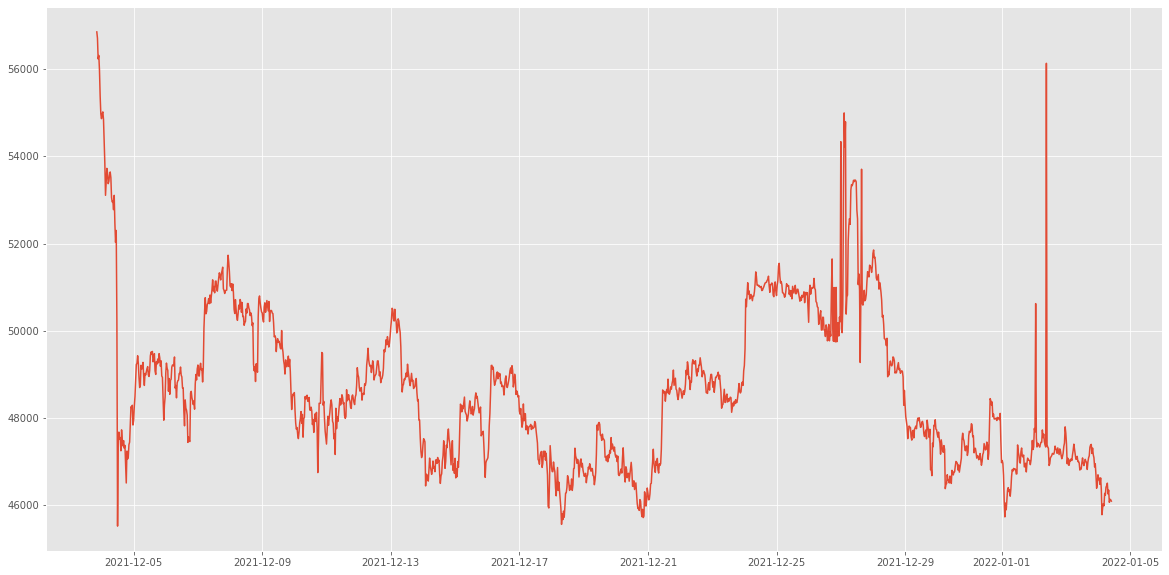

In [38]:
plt.figure(figsize = (20,10))
plt.plot(df_30_m['Date'],df_30_m['Close'])
plt.show()

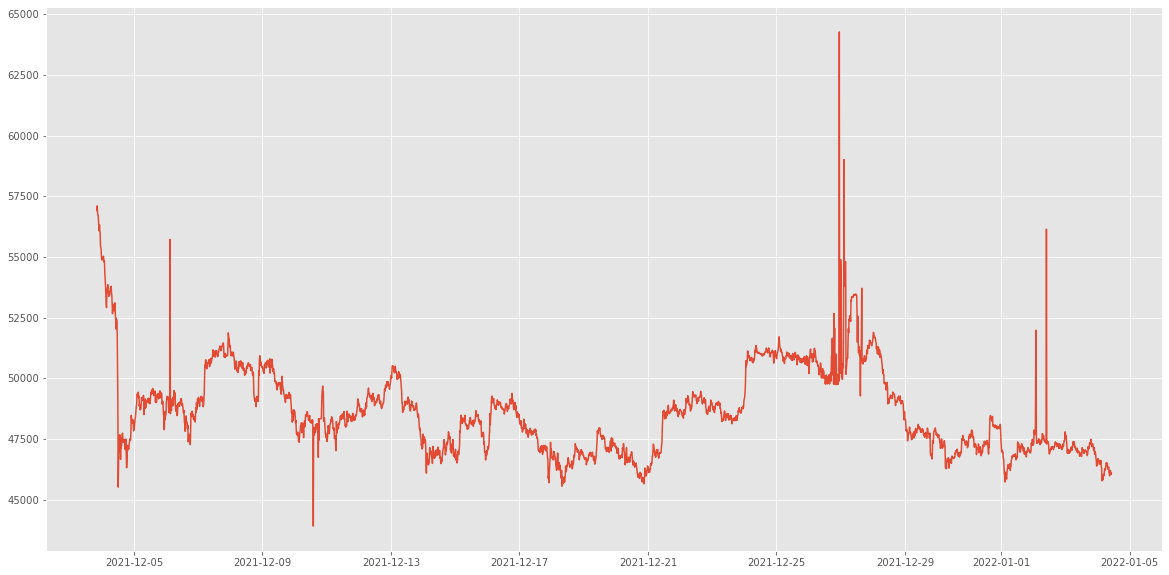

In [39]:
plt.figure(figsize = (20,10))
plt.plot(df_4h['Date'],df_4h['Close'])
plt.show()

In [40]:
df_4h[['Date','Open','High','Low','Close','Volume']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3033 entries, 0 to 3032
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3033 non-null   datetime64[ns]
 1   Open    3033 non-null   float64       
 2   High    3033 non-null   float64       
 3   Low     3033 non-null   float64       
 4   Close   3033 non-null   float64       
 5   Volume  3033 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 142.3 KB


In [41]:
# Đổi datetime sang timestamp
from datetime import datetime, timezone, timedelta
import seaborn as sns

my_dt = datetime(2018, 1, 1, 0, 0, 0)
my_timestamp = (my_dt - datetime(1970, 1, 1)) / timedelta(seconds=1)

my_timestamp = str(int(my_timestamp)*1000)
my_timestamp

'1514764800000'

In [42]:
x = df_4h[['Open','High','Low','Volume']]

y = df_4h[['Close']] 

df_date = df_4h[['Date']]

In [43]:
split_percent=0.6
split=int(split_percent*len(df_4h))
x_train = x[:split]
y_train = y[:split]
df_date_1 = df_date[:split]

x_test = x[split:]
y_test = y[split:]
df_date_2 = df_date[split:]

In [44]:
def isSupport(x_train,i):
    support = x_train['Low'][i] < x_train['Low'][i-1]  and x_train['Low'][i] < x_train['Low'][i+1] 
    return support
def isResistance(x_train,i):
    resistance = x_train['High'][i] > x_train['High'][i-1]  and x_train['High'][i] > x_train['High'][i+1] 
    return resistance
levels_high = []
levels_low = []
for i in range(2,x_train.shape[0]-1):
    if isSupport(x_train,i):
        levels_low.append(x_train['Low'][i])
    elif isResistance(x_train,i):
        levels_high.append(x_train['High'][i])

In [45]:
df = pd.DataFrame(data = levels_high)
df.columns = ['high']
df_1 = pd.DataFrame(data = levels_low)
df_1.columns = ['Low']

In [46]:
len(levels_high)

336

In [47]:
len(levels_low)

413

In [48]:
kmeans=KMeans(n_clusters=6)
model=kmeans.fit(df[['high']])
k=model.cluster_centers_
k

array([[ 48862.15317568],
       [148571.77      ],
       [ 75646.86461538],
       [245932.5       ],
       [113333.33333333],
       [ 56461.95428571]])

In [49]:
kmeans=KMeans(n_clusters=6)
model_1=kmeans.fit(df_1[['Low']])
k_1=model_1.cluster_centers_
k_1

array([[41950.63210526],
       [48871.95572193],
       [22752.005     ],
       [36098.84190476],
       [46357.56569767],
       [ 9525.7375    ]])

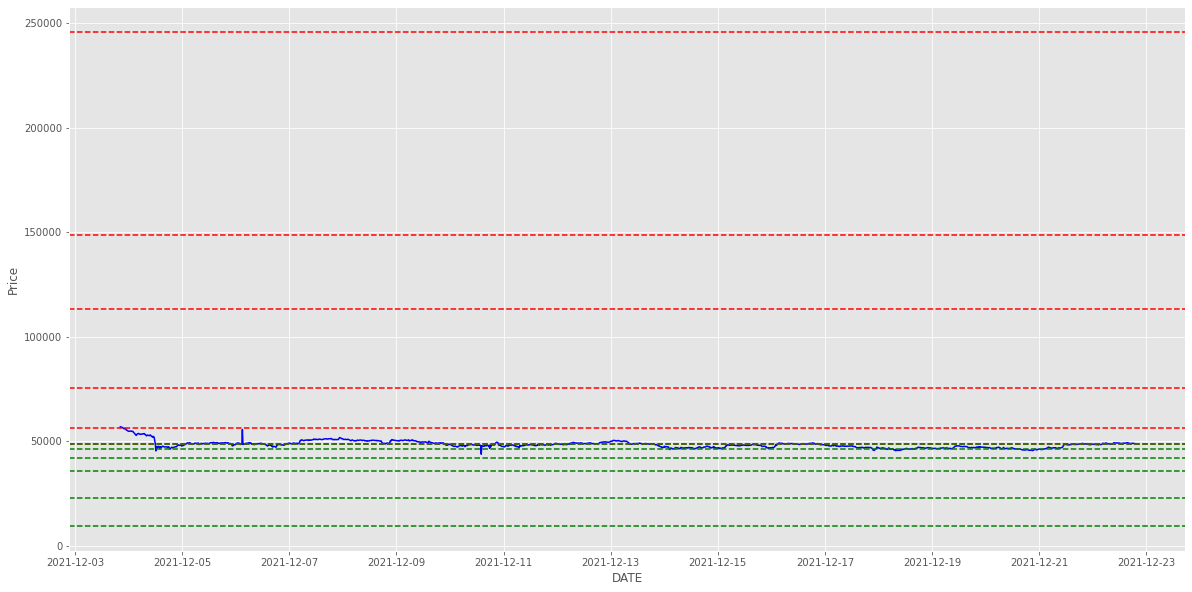

In [50]:
plt.figure(figsize=(20,10))
plt.plot(df_date_1,y_train, c='b')
plt.xlabel('DATE')
plt.ylabel('Price')
for i in range(len(k)):
    plt.axhline(float(k[i]),c='r',ls='--')
for i in range(len(k_1)):
    plt.axhline(float(k_1[i]),c='g',ls='--')


In [51]:
s =np.mean(x_train['High'] - x_train['Low'])
high = []
low = []
min_high = []
min_low =[]
for i in range(len(k)):
    for j in range(len(k_1)):
        if (k[i] - k_1[j]) > (s/3) and (k[i] - k_1[j]) < (s*3):

                high.append(k[i])

                low.append(k_1[j])
for i in range(len(high)):
    a = high[i] - np.mean(x_train['High'])
    if a < 0:
        min_high.append((-a,high[i]))
    else:
        min_high.append((a,high[i]))
    b = np.mean(x_train['Low']) - low[i]
    if b < 0:
        min_low.append((-b,low[i]))
    else:
        min_low.append((b,low[i]))

In [52]:
min_high

[(array([894.31441641]), array([48862.15317568])),
 (array([894.31441641]), array([48862.15317568])),
 (array([6705.48669363]), array([56461.95428571]))]

In [53]:
min_low

[(array([5174.73529441]), array([41950.63210526])),
 (array([767.801702]), array([46357.56569767])),
 (array([1746.58832226]), array([48871.95572193]))]

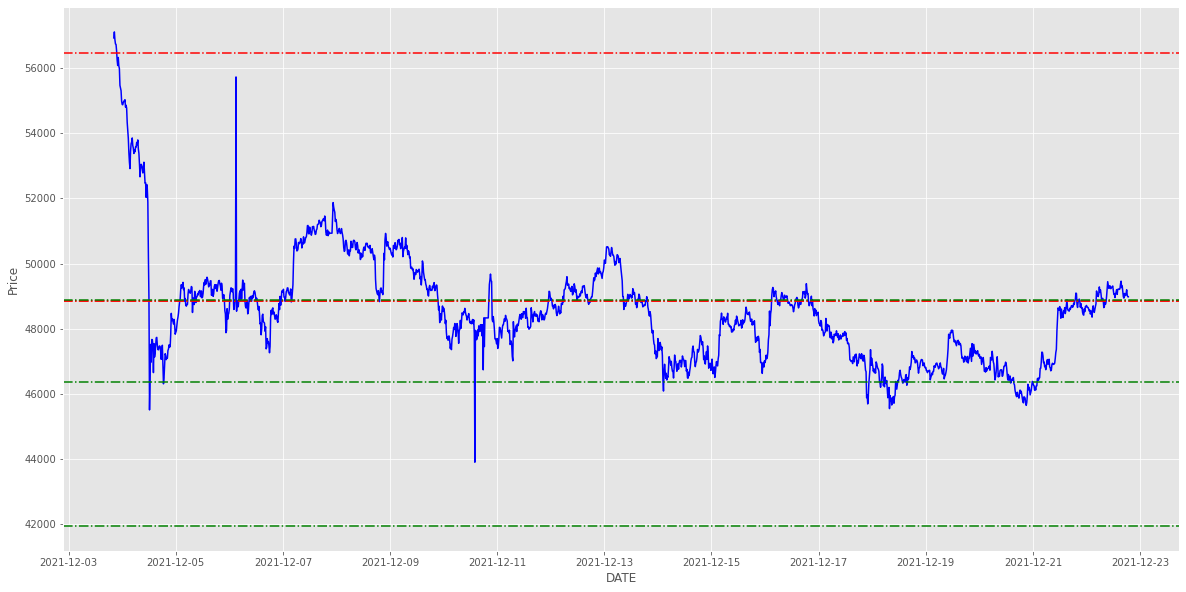

In [54]:
plt.figure(figsize=(20,10))
plt.plot(df_date_1,y_train, c='b')
plt.xlabel('DATE')
plt.ylabel('Price')
for i in range(len(high)):
    plt.axhline(float(high[i]),c='r',ls='-.')
for i in range(len(low)):
    plt.axhline(float(low[i]),c='g',ls='-.')


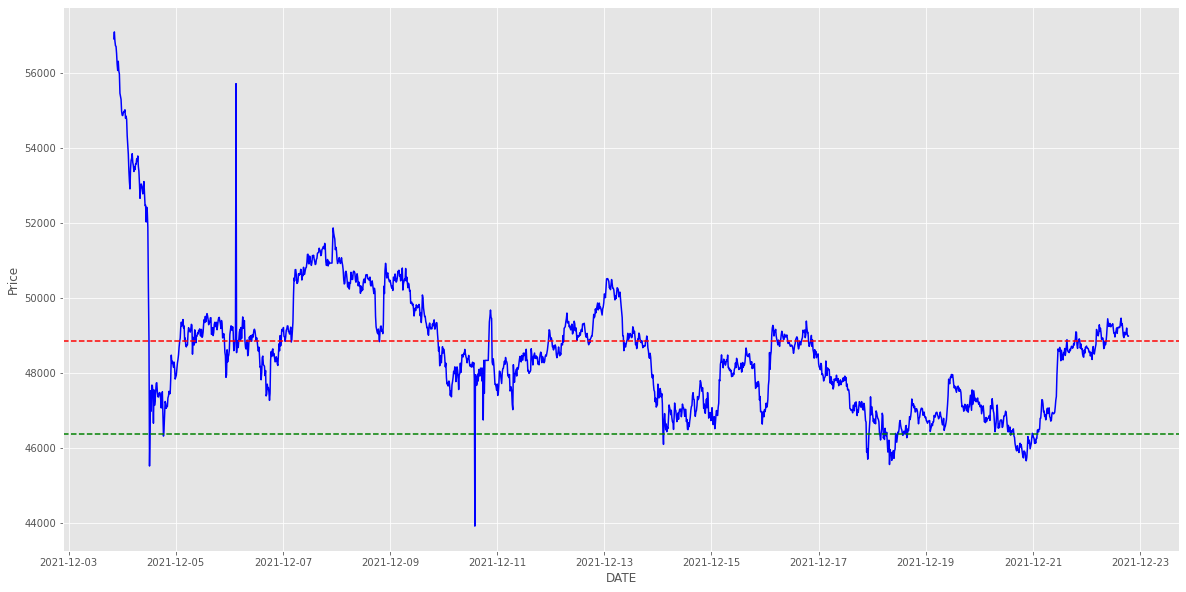

In [55]:
plt.figure(figsize=(20,10))
plt.plot(df_date_1,y_train, c='b')
plt.xlabel('DATE')
plt.ylabel('Price')
plt.axhline(float(min(min_low)[1]),c='g',ls='--')
plt.axhline(float(min(min_high)[1]),c='r',ls='--')

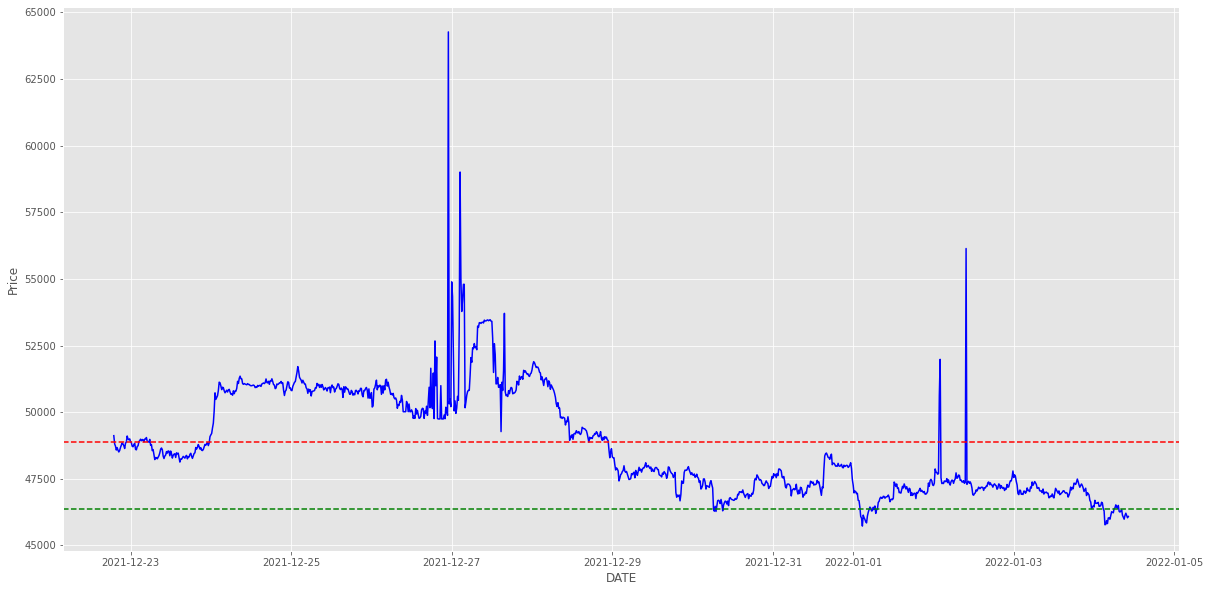

In [56]:
plt.figure(figsize=(20,10))
plt.plot(df_date_2,y_test, c='b')
plt.xlabel('DATE')
plt.ylabel('Price')
plt.axhline(float(min(min_low)[1]),c='g',ls='--')
plt.axhline(float(min(min_high)[1]),c='r',ls='--')

In [62]:
y_test=y_test.reset_index()
df_date_2=df_date_2.reset_index()

In [63]:
break_res=0
no_break_res=0
break_sp=0
no_break_sp=0

for i in range(2,len(y_test['Close'])):
    if y_test['Close'][i-2] < y_test['Close'][i-1] and y_test['Close'][i-1] < min(min_high)[1] and y_test['Close'][i] > min(min_high)[1] and (y_test['Close'][i] - min(min_high)[1]) > 0.003*y_test['Close'][len(y_test['Close'])-1]:
        break_res+=1

    elif y_test['Close'][i-2] < y_test['Close'][i-1] and y_test['Close'][i-1] > min(min_high)[1] and ( y_test['Close'][i-1] - min(min_high)[1] ) <= 0.003*y_test['Close'][len(y_test['Close'])-1] and y_test['Close'][i] < min(min_high)[1]:
        no_break_res+=1
        
    elif y_test['Close'][i-2] > y_test['Close'][i-1] and y_test['Close'][i-1] < min(min_low)[1] and y_test['Close'][i] < min(min_low)[1] and ( min(min_low)[1] -  y_test['Close'][i] ) > 0.003*y_test['Close'][len(y_test['Close'])-1]:
        break_sp+=1
        
    elif y_test['Close'][i-2] > y_test['Close'][i-1] and y_test['Close'][i-1] < min(min_low)[1] and ( min(min_low)[1] -  y_test['Close'][i-1] ) <= 0.003*y_test['Close'][len(y_test['Close'])-1] and y_test['Close'][i] > min(min_low)[1]:
        no_break_sp+=1
diction = {'break_res' : break_res,
           'no_break_res' : no_break_res,
           'break_sp' : break_sp,
           'no_break_sp' : no_break_sp}

In [64]:
diction

{'break_res': 2, 'no_break_res': 7, 'break_sp': 27, 'no_break_sp': 4}

In [73]:
def ratio(break_res,no_break_res,break_sp,no_break_sp):
    total_res = break_res + no_break_res
    if total_res != 0:
        ratio_res = (no_break_res / total_res)*100
        print({'ratio_res' : ratio_res})
    total_sp = break_sp + no_break_sp
    if total_sp != 0:
        ratio_sp = (no_break_sp / total_sp)*100
        print({'ratio_sp' : ratio_sp})
    return

In [74]:
ratio(break_res,no_break_res,break_sp,no_break_sp)

{'ratio_res': 77.77777777777779}
{'ratio_sp': 12.903225806451612}


In [51]:
x = df_30_m[['Open','High','Low','Volume']]

y = df_30_m[['Close']] 

df_date = df_30_m[['Date']]

In [52]:
split_percent=0.7
split=int(split_percent*len(df_30_m))
x_train = x[:split]
y_train = y[:split]
df_date_1 = df_date[:split]

x_test = x[split:]
y_test = y[split:]
df_date_2 = df_date[split:]

In [53]:
def sp(x_train):
    spport = min(x_train['Low'][(len(x_train['Low'])-1440):(len(x_train['Low'])-1)])
    return spport
def res(x_train):
    restance = max(x_train['Low'][(len(x_train['Low'])-1440):(len(x_train['Low'])-1)])
    return restance

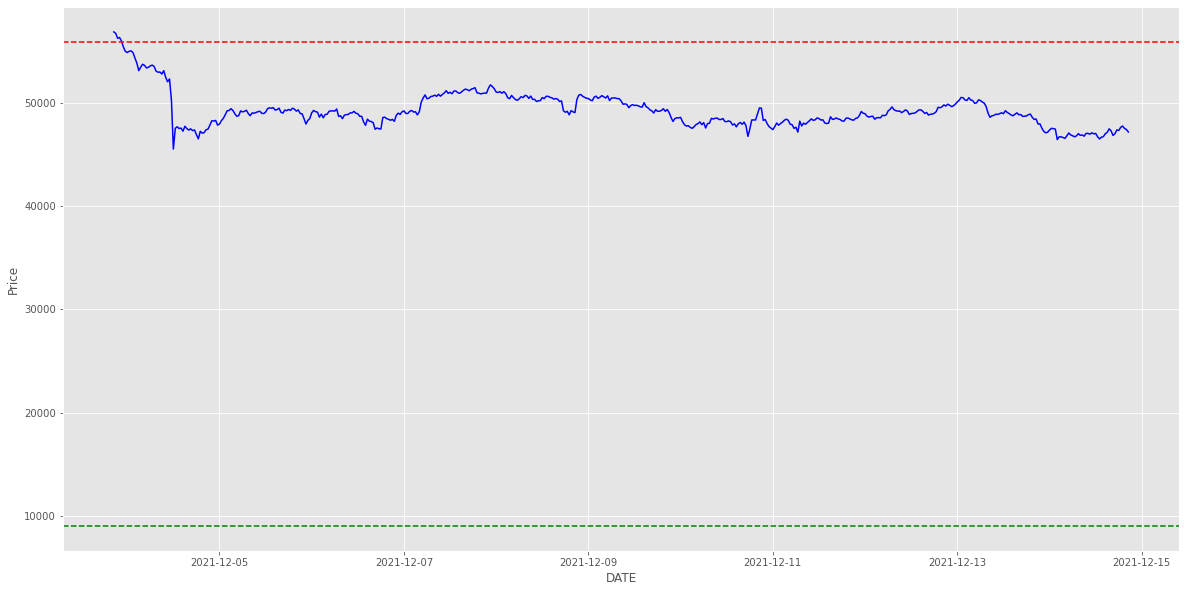

In [54]:
plt.figure(figsize=(20,10))
plt.plot(df_date_1,y_train, c='b')
plt.xlabel('DATE')
plt.ylabel('Price')

plt.axhline(float(sp(x_train)),c='g',ls='--')

plt.axhline(float(res(x_train)),c='r',ls='--')

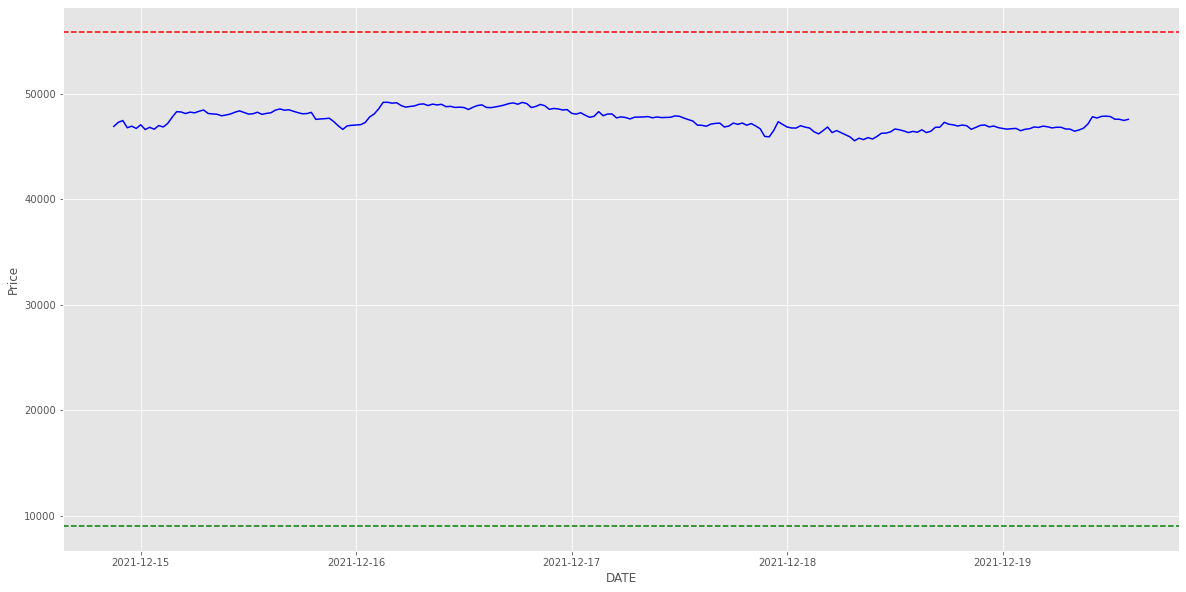

In [55]:
plt.figure(figsize=(20,10))
plt.plot(df_date_2,y_test, c='b')
plt.xlabel('DATE')
plt.ylabel('Price')
plt.axhline(float(sp(x_train)),c='g',ls='--')
plt.axhline(float(res(x_train)),c='r',ls='--')

In [56]:
df_date_1.loc[125]

Date   2021-12-06 11:00:00
Name: 125, dtype: datetime64[ns]

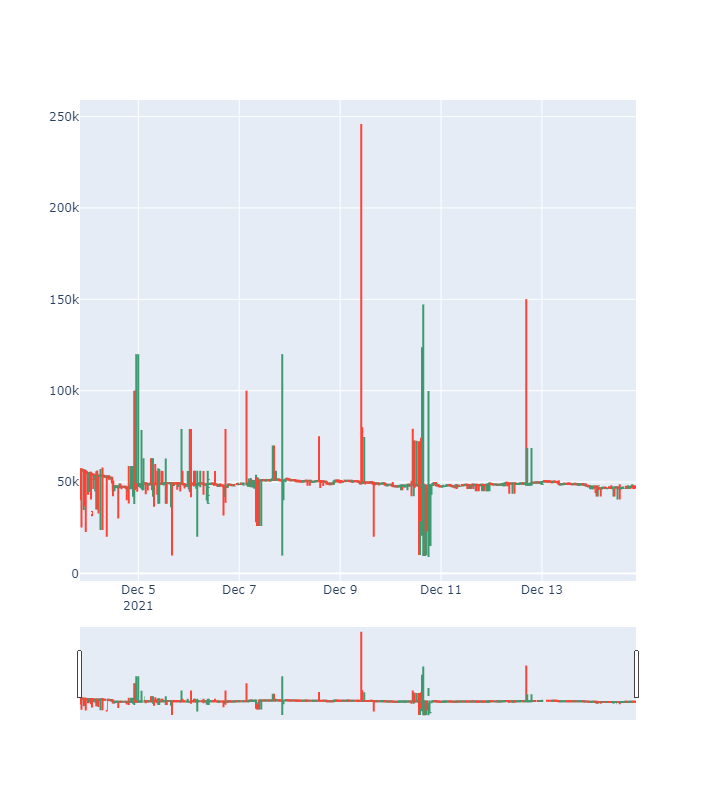

In [57]:
fig = go.Figure(data = [go.Candlestick(x = df_date_1['Date'], open =x_train['Open'],high = x_train['High'],low = x_train['Low'],close = y_train['Close'])])
fig.update_layout(width=900,
    height=800)
fig.show()

In [89]:
df_01.Close.loc[:10000]

NameError: name 'df_01' is not defined

In [729]:
from binance.enums import *
from binance.exceptions import BinanceAPIException, BinanceOrderException
try:
    buy_limit = client.create_order(
        symbol='ETHUSDT',
        side='BUY',
        type='LIMIT',
        quantity=10,
        timeInForce='GTC',
        price = 213
        )

except BinanceAPIException as e:
    # error handling goes here
    print(e)
except BinanceOrderException as e:
    # error handling goes here
    print(e)

In [79]:
from binance.enums import *
from binance.exceptions import BinanceAPIException, BinanceOrderException
try:
    sell_limit = client.create_order(
        symbol='BTCUSDT',
        side='SELL',
        type='MARKET',
        quantity=0.02)

except BinanceAPIException as e:
    # error handling goes here
    print(e)
except BinanceOrderException as e:
    # error handling goes here
    print(e)

In [80]:
# Lấy giá etherum mới nhất 
eth_price = client.get_symbol_ticker(symbol="BTCUSDT")
eth_price

{'symbol': 'BTCUSDT', 'price': '47340.00000000'}

In [81]:
sell_limit

{'symbol': 'BTCUSDT',
 'orderId': 9842733,
 'orderListId': -1,
 'clientOrderId': 'wadNGMEPHMU3JXYE7hRXQv',
 'transactTime': 1640876403076,
 'price': '0.00000000',
 'origQty': '0.02000000',
 'executedQty': '0.02000000',
 'cummulativeQuoteQty': '946.80009612',
 'status': 'FILLED',
 'timeInForce': 'GTC',
 'type': 'MARKET',
 'side': 'SELL',
 'fills': [{'price': '47340.01000000',
   'qty': '0.00961200',
   'commission': '0.00000000',
   'commissionAsset': 'USDT',
   'tradeId': 2249394},
  {'price': '47340.00000000',
   'qty': '0.01038800',
   'commission': '0.00000000',
   'commissionAsset': 'USDT',
   'tradeId': 2249395}]}

In [82]:
client.get_account()

{'makerCommission': 0,
 'takerCommission': 0,
 'buyerCommission': 0,
 'sellerCommission': 0,
 'canTrade': True,
 'canWithdraw': False,
 'canDeposit': False,
 'updateTime': 1640876403076,
 'accountType': 'SPOT',
 'balances': [{'asset': 'BNB',
   'free': '1000.00000000',
   'locked': '0.00000000'},
  {'asset': 'BTC', 'free': '0.89000000', 'locked': '0.00000000'},
  {'asset': 'BUSD', 'free': '10000.00000000', 'locked': '0.00000000'},
  {'asset': 'ETH', 'free': '98.15206000', 'locked': '0.00000000'},
  {'asset': 'LTC', 'free': '500.00000000', 'locked': '0.00000000'},
  {'asset': 'TRX', 'free': '500000.00000000', 'locked': '0.00000000'},
  {'asset': 'USDT', 'free': '13225.97501500', 'locked': '0.00000000'},
  {'asset': 'XRP', 'free': '50000.00000000', 'locked': '0.00000000'}],
 'permissions': ['SPOT']}

In [731]:
cancel = client.cancel_order(symbol='ETHUSDT', orderId=buy_limit['orderId'])

In [ ]:
sell_limit = client.order_limit_sell(symbol='ETHUSDT', quantity=100, price=100)

In [487]:
buy_limit

{'symbol': 'ETHUSDT',
 'orderId': 171727,
 'orderListId': -1,
 'clientOrderId': '6i64s1s7PLAqAprfi3b6XJ',
 'transactTime': 1637507273503,
 'price': '100.00000000',
 'origQty': '100.00000000',
 'executedQty': '0.00000000',
 'cummulativeQuoteQty': '0.00000000',
 'status': 'NEW',
 'timeInForce': 'GTC',
 'type': 'LIMIT',
 'side': 'SELL',
 'fills': []}

In [488]:
market_order

{'symbol': 'ETHUSDT',
 'orderId': 171725,
 'orderListId': -1,
 'clientOrderId': 'DqY11fnofdE7GRkcou4kR2',
 'transactTime': 1637507250234,
 'price': '0.00000000',
 'origQty': '100.00000000',
 'executedQty': '0.00000000',
 'cummulativeQuoteQty': '0.00000000',
 'status': 'EXPIRED',
 'timeInForce': 'GTC',
 'type': 'MARKET',
 'side': 'SELL',
 'fills': []}

In [319]:
try:
    order = client.create_oco_order(
        symbol='ETHUSDT',
        side='SELL',
        quantity=100,
        price=100,
        stopPrice=50,
        stopLimitPrice=50,
        stopLimitTimeInForce='GTC')

except BinanceAPIException as e:
    # error handling goes here
    print(e)
except BinanceOrderException as e:
    # error handling goes here
    print(e)

APIError(code=-2010): The relationship of the prices for the orders is not correct.


In [491]:
info = client.get_symbol_info('ETHUSDT')
print(info['orderTypes'])

['LIMIT', 'LIMIT_MAKER', 'MARKET', 'STOP_LOSS_LIMIT', 'TAKE_PROFIT_LIMIT']


In [492]:
info

{'symbol': 'ETHUSDT',
 'status': 'TRADING',
 'baseAsset': 'ETH',
 'baseAssetPrecision': 8,
 'quoteAsset': 'USDT',
 'quotePrecision': 8,
 'quoteAssetPrecision': 8,
 'baseCommissionPrecision': 8,
 'quoteCommissionPrecision': 8,
 'orderTypes': ['LIMIT',
  'LIMIT_MAKER',
  'MARKET',
  'STOP_LOSS_LIMIT',
  'TAKE_PROFIT_LIMIT'],
 'icebergAllowed': True,
 'ocoAllowed': True,
 'quoteOrderQtyMarketAllowed': True,
 'isSpotTradingAllowed': True,
 'isMarginTradingAllowed': False,
 'filters': [{'filterType': 'PRICE_FILTER',
   'minPrice': '0.01000000',
   'maxPrice': '100000.00000000',
   'tickSize': '0.01000000'},
  {'filterType': 'PERCENT_PRICE',
   'multiplierUp': '5',
   'multiplierDown': '0.2',
   'avgPriceMins': 5},
  {'filterType': 'LOT_SIZE',
   'minQty': '0.00001000',
   'maxQty': '9000.00000000',
   'stepSize': '0.00001000'},
  {'filterType': 'MIN_NOTIONAL',
   'minNotional': '10.00000000',
   'applyToMarket': True,
   'avgPriceMins': 5},
  {'filterType': 'ICEBERG_PARTS', 'limit': 10},
  